In [38]:
import pandas as pd
import rdkit.Chem as Chem
import seaborn as sns
import matplotlib.pyplot as plt

from rdkit.Chem import AllChem
from rdkit.Chem.rdMolDescriptors import GetMorganFingerprintAsBitVect
import umap

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from dataloader import DataLoader

In [39]:
#df = pd.read_csv("datasets/leffingwell/leffingwell_combined.csv")
df = pd.read_csv("datasets/mayhew_2022/mayhew_2022_combined.csv")

In [40]:
df['rdkit'] = df.apply(lambda row: Chem.MolFromSmiles(row['IsomericSMILES']), axis=1)

In [4]:
df['morgfp'] = df.apply(lambda row: GetMorganFingerprintAsBitVect(row['rdkit'], radius=3, nBits=2048), axis=1)

In [5]:
df['fp'] = df.apply(lambda row: row['morgfp'].ToList(), axis=1)

In [6]:
umap_model = umap.UMAP(metric = "jaccard",
                       densmap=True,
                       random_state=42,
                       low_memory = False)
X_umap = umap_model.fit_transform(list(df['morgfp']))
df["UMAP_0"], df["UMAP_1"] = X_umap[:,0], X_umap[:,1]

/home/chertian/miniconda3/envs/dream/lib/python3.9/site-packages/umap/umap_.py:1880: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(
/home/chertian/miniconda3/envs/dream/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Text(0.5, 1.0, 'Mayhew Morgan Fingerprints')

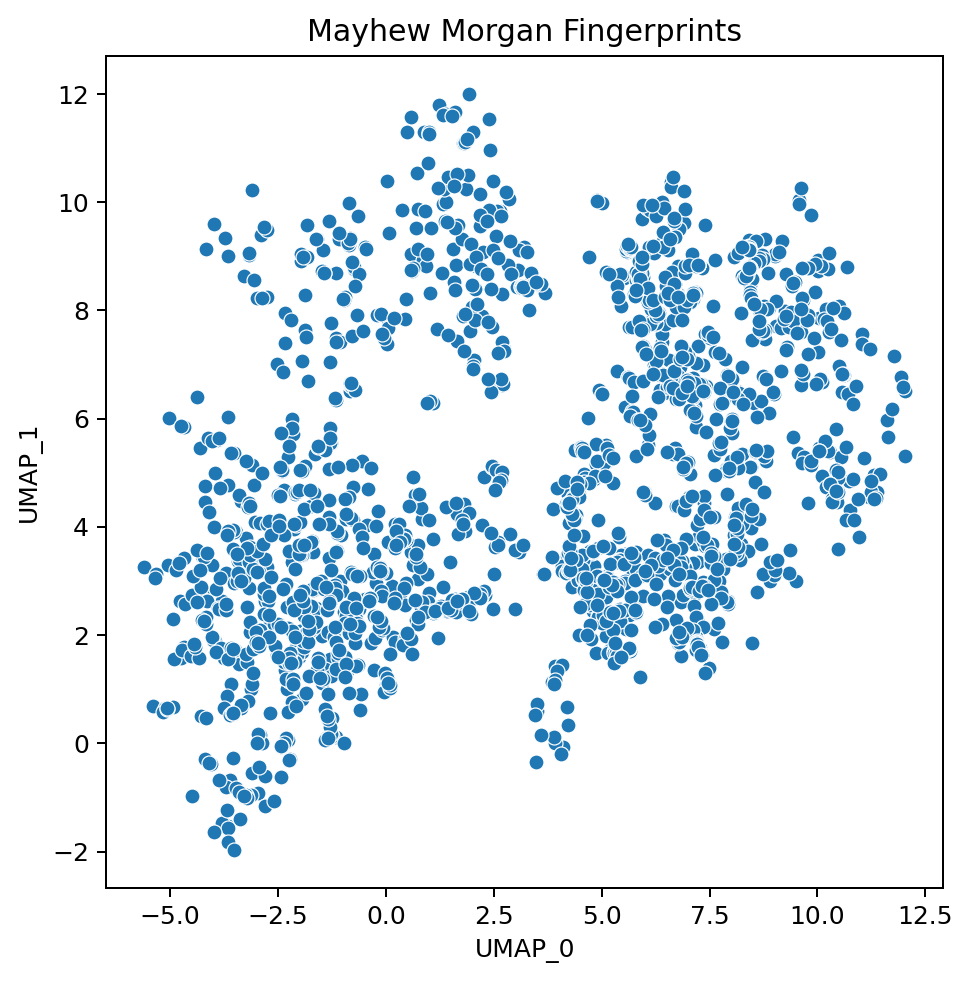

In [7]:
fig, ax = plt.subplots(1,1, figsize=(6,6), dpi=180)
g = sns.scatterplot(x="UMAP_0", y="UMAP_1", data=df, ax=ax)
ax.set_title("Mayhew Morgan Fingerprints")

In [8]:
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(df['fp'].to_list())


In [9]:
pca.explained_variance_ratio_

array([0.06251941, 0.0402106 , 0.03087632, 0.02364612, 0.01775778,
       0.01695887, 0.01473257, 0.01366796, 0.01309144, 0.01189287,
       0.01134763, 0.01039595, 0.00948487, 0.00865692, 0.00855688,
       0.00791355, 0.00775113, 0.00740751, 0.00708089, 0.00683831])

Text(0, 0.5, 'PC1 (4.0%)')

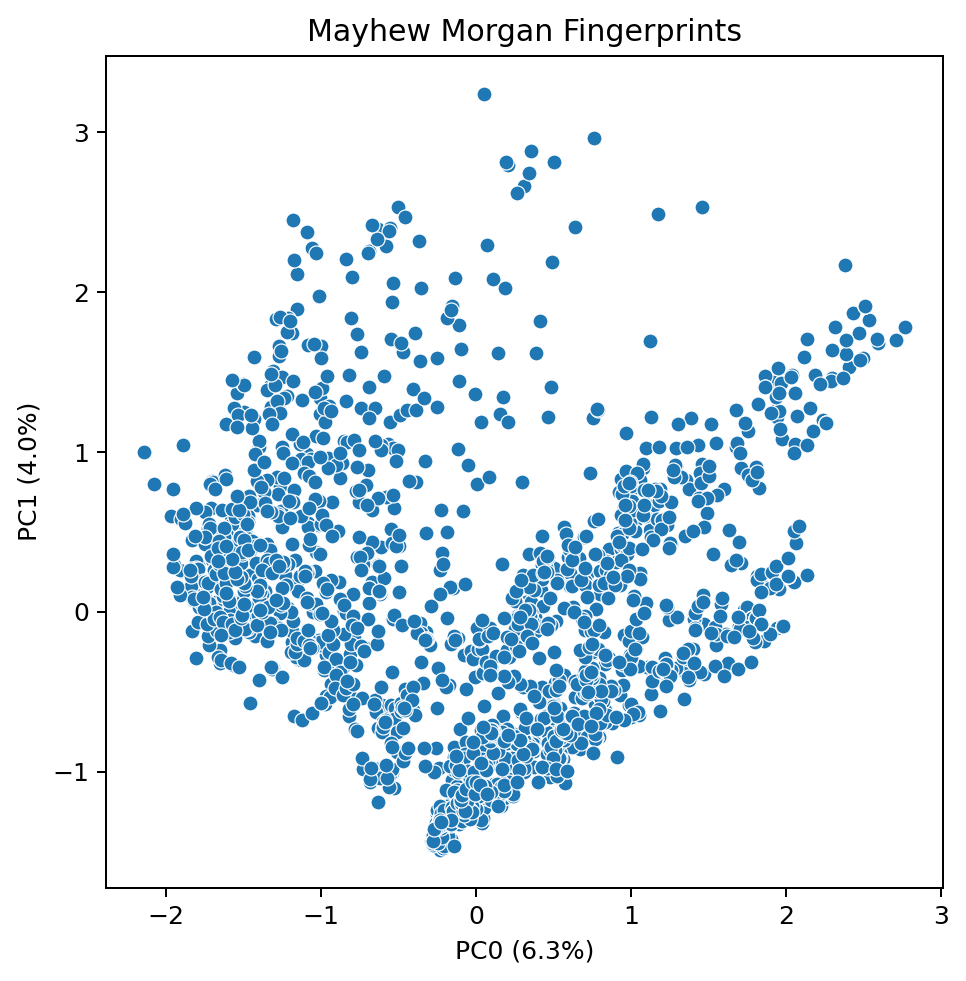

In [11]:
fig, ax = plt.subplots(1,1, figsize=(6,6), dpi=180)
g = sns.scatterplot(x=principalComponents[:, 0], y=principalComponents[:, 1], ax=ax)
ax.set_title("Mayhew Morgan Fingerprints")
ax.set_xlabel("PC0 (6.3%)")
ax.set_ylabel("PC1 (4.0%)")

In [14]:
data = DataLoader()
data.load_benchmark("mayhew_2022")
data.featurize("rdkit2d_normalized_features")

In [33]:
df = pd.DataFrame(data.features)

In [27]:
umap_model = umap.UMAP(metric = "jaccard",
                       densmap=True,
                       random_state=42,
                       low_memory = False)
X_umap = umap_model.fit_transform(df)
df["UMAP_0"], df["UMAP_1"] = X_umap[:,0], X_umap[:,1]

/home/chertian/miniconda3/envs/dream/lib/python3.9/site-packages/umap/umap_.py:1880: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(
/home/chertian/miniconda3/envs/dream/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [31]:
df["UMAP_0"], df["UMAP_1"] = X_umap[:,0], X_umap[:,1]

Text(0.5, 1.0, 'Mayhew RDKit 2D Normalized')

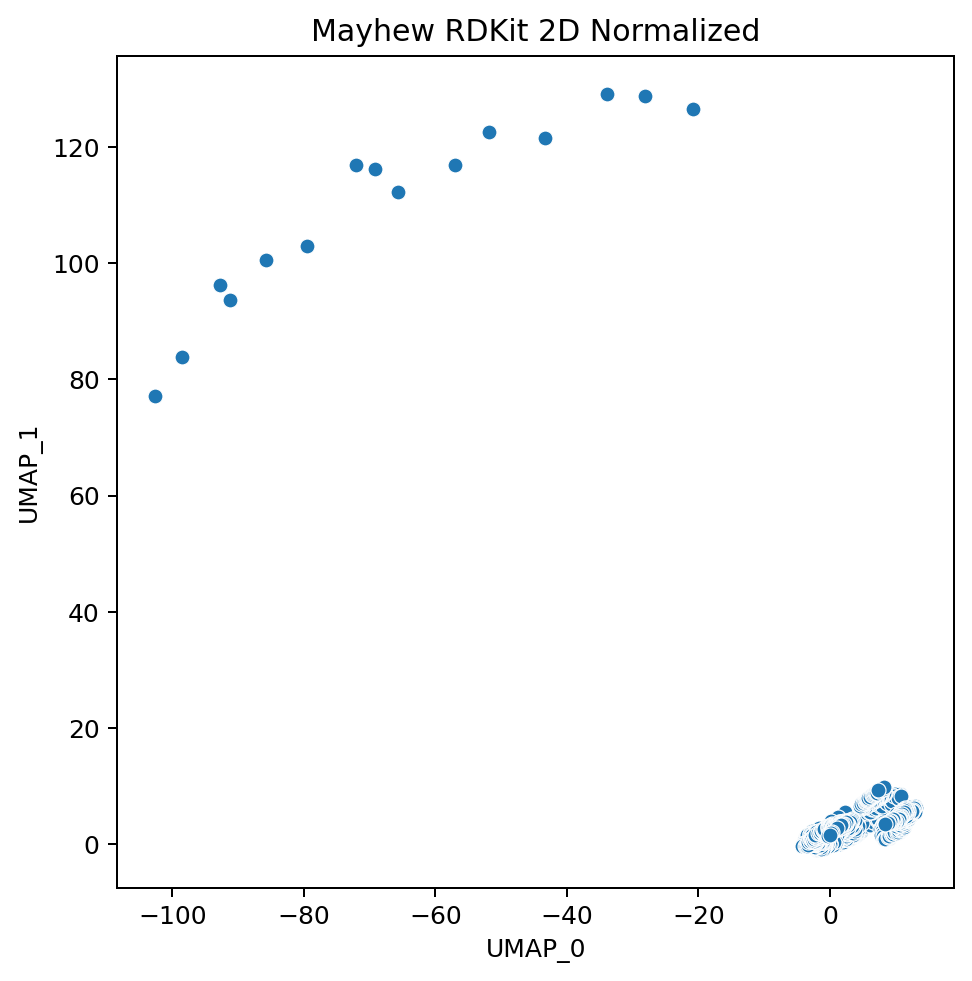

In [28]:
fig, ax = plt.subplots(1,1, figsize=(6,6), dpi=180)
g = sns.scatterplot(x="UMAP_0", y="UMAP_1", data=df, ax=ax)
ax.set_title("Mayhew RDKit 2D Normalized")

In [34]:
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(df)

In [35]:
pca.explained_variance_ratio_

array([0.19768802, 0.13716938, 0.11910423, 0.07913118, 0.05311541,
       0.04806167, 0.0343078 , 0.03109333, 0.0242084 , 0.02108433,
       0.01820464, 0.01660466, 0.01570332, 0.0137741 , 0.01188968,
       0.01061075, 0.00967486, 0.00934203, 0.00856638, 0.00808821])

Text(0, 0.5, 'PC1 (13.7%)')

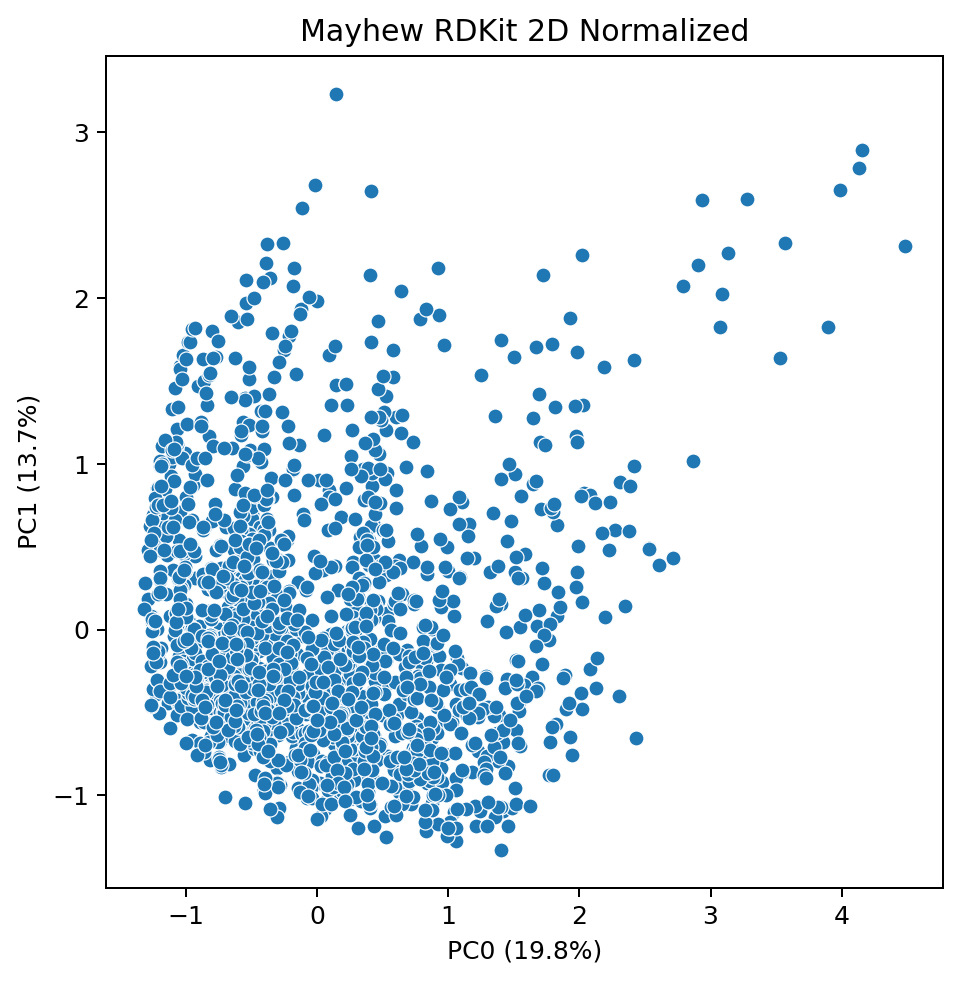

In [36]:
fig, ax = plt.subplots(1,1, figsize=(6,6), dpi=180)
g = sns.scatterplot(x=principalComponents[:, 0], y=principalComponents[:, 1], ax=ax)
ax.set_title("Mayhew RDKit 2D Normalized")
ax.set_xlabel("PC0 (19.8%)")
ax.set_ylabel("PC1 (13.7%)")

In [ ]:
df["UMAP_0"], df["UMAP_1"] = X_umap[:,0], X_umap[:,1]

In [32]:
df[df["UMAP_0"] <= -19].index

Index([1124, 1192, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203,
       1204, 1205, 1206],
      dtype='int64')

In [ ]:
orig_data = DataLoader()
orig_data.load_benchmark("leffingwell")

In [ ]:
orig_data.features[2340:2354]

In [ ]:
df[df["UMAP_0"] >= 40].index.values

In [ ]:
df.iloc[2338:2356].to_csv('tryanalyze.csv')

In [ ]:
pd.set_option("display.max_columns", 500)

In [ ]:
import mols2grid

mols2grid.display(dg, smiles_col="smiles")

In [ ]:
dg = pd.DataFrame(orig_data.features[2340:2354], columns=[['smiles']])

In [ ]:
dg['mol'] = dg.apply(lambda row: Chem.MolFromSmiles(row['smiles']), axis=1)

In [ ]:
dg['mol'][0]

In [ ]:
dg

In [ ]:
dg['mol'].to_numpy()[4][0]

In [41]:
df['mw'] = df.apply(lambda row: Chem.Descriptors.ExactMolWt(row['rdkit']), axis=1)

In [ ]:
df['mw']

Text(0.5, 1.0, 'Mayhew MW Distribution')

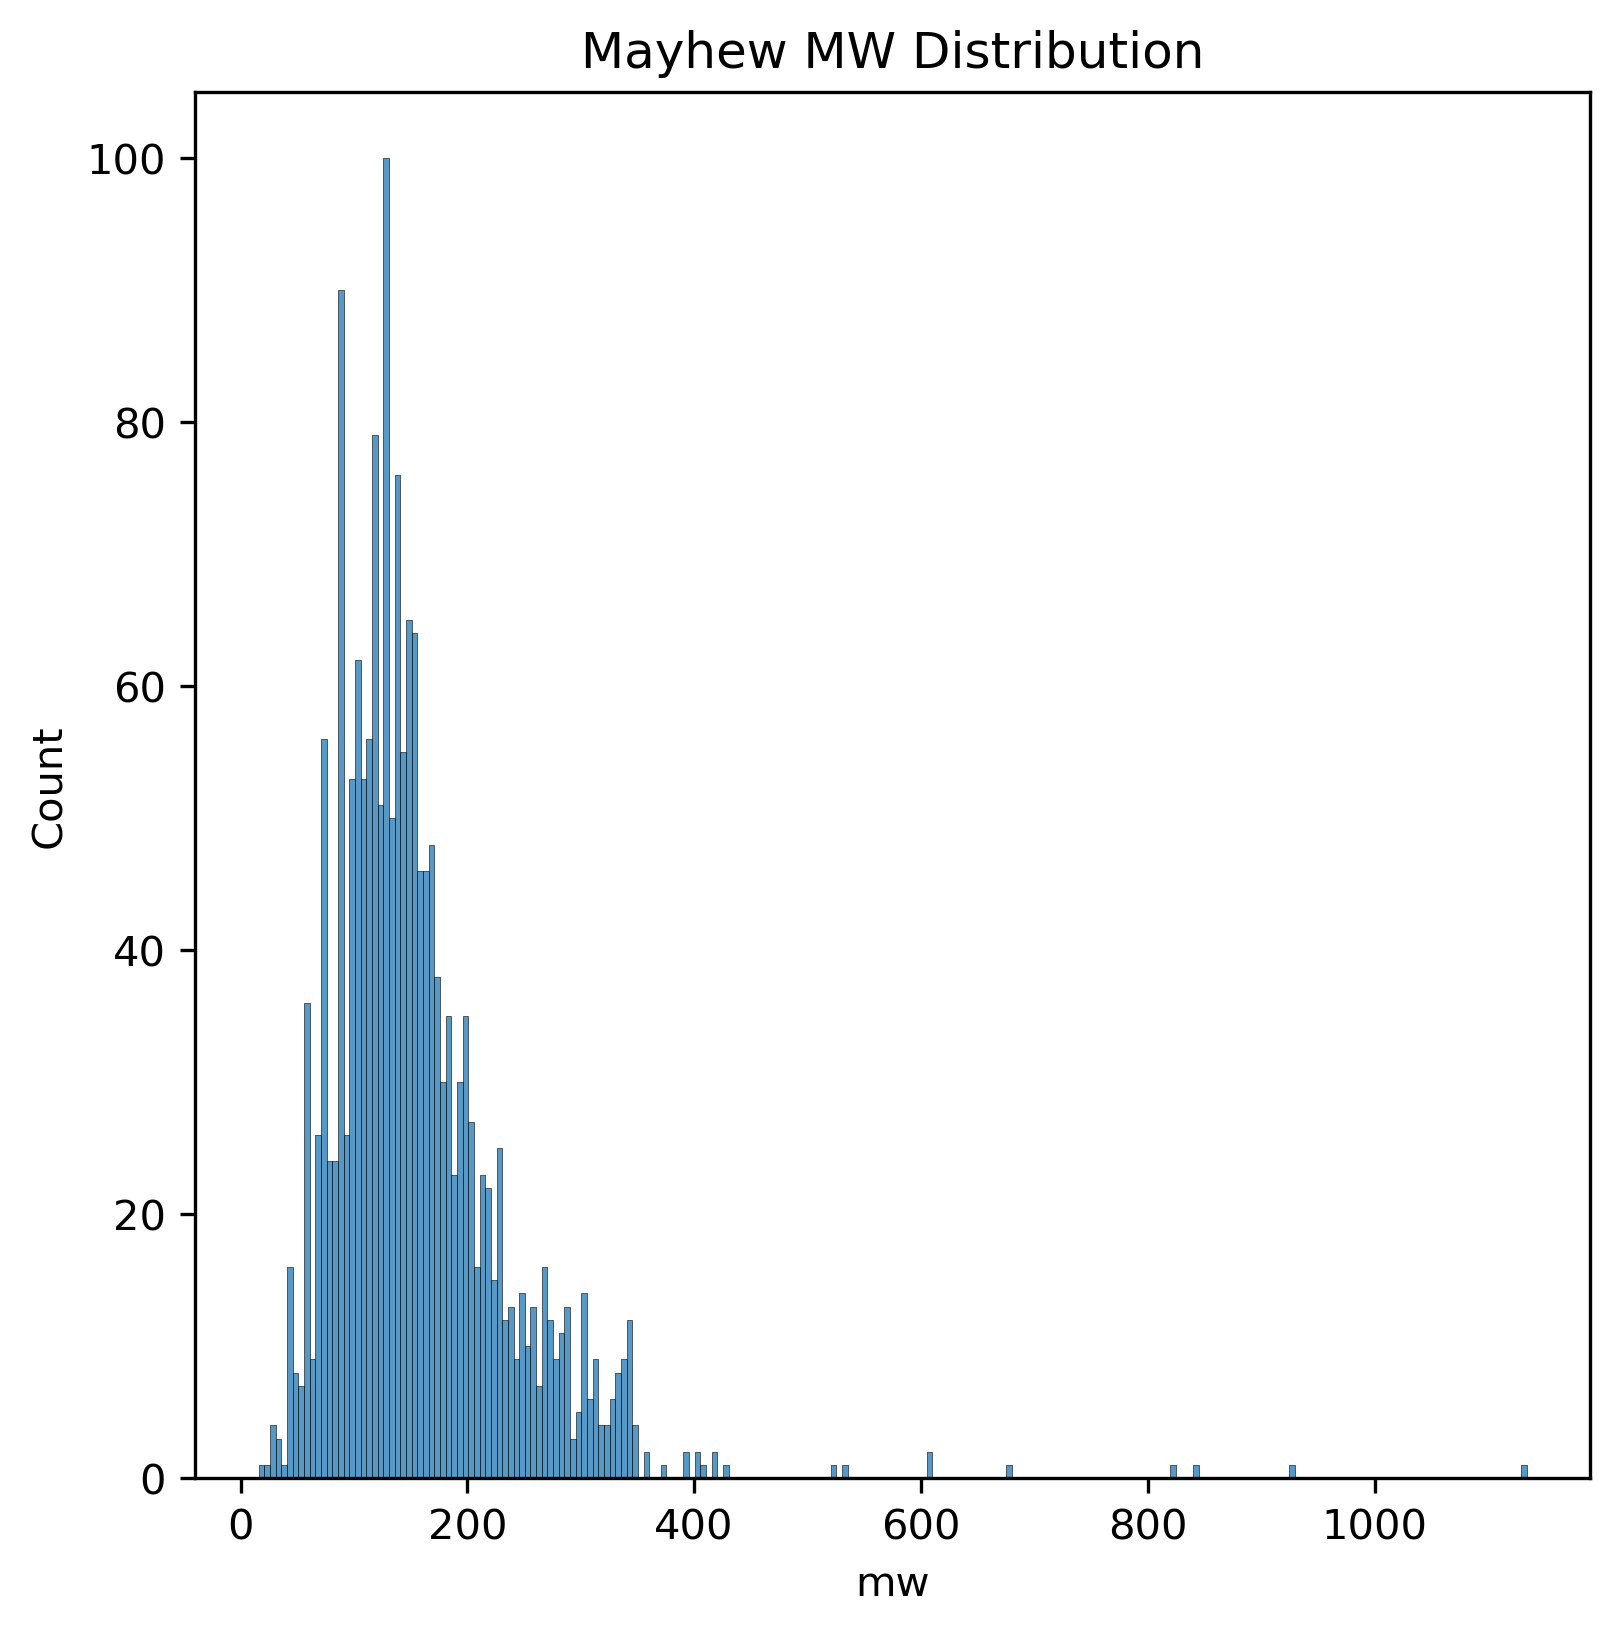

In [42]:
fig, ax = plt.subplots(1,1, figsize=(6,6), dpi=300)
g = sns.histplot(df['mw'], ax=ax, binwidth=5)
ax.set_title("Mayhew MW Distribution")

In [ ]:
label_counts = df[df.columns[7:-2]].sum()
fig, ax = plt.subplots(1,1, figsize=(6,6), dpi=300)
g = sns.barplot(label_counts, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', fontsize=4)

In [ ]:
sub_df = df[df.columns[7:-2]]
sub_df['multilabelity'] = sub_df.sum(axis=1)

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(6,6), dpi=300)
g = sns.histplot(sub_df['multilabelity'], ax=ax, binwidth=1, discrete=True)
ax.set_title("Leffingwell Multilabel")
ax.set_xticks(range(1,10))

In [43]:
def get_elements(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        elements = {atom.GetSymbol() for atom in mol.GetAtoms()}
        return tuple(sorted(elements))
    else:
        return []

In [44]:
from collections import Counter

df['Element_Sets'] = df['IsomericSMILES'].apply(get_elements)

# Create a Counter to count the occurrences of each set of elements
element_set_counts = Counter(df['Element_Sets'])

element_set_counts_df = pd.DataFrame(
    list(element_set_counts.items()), 
    columns=['Element_Set', 'Count']
)

# Convert tuple to string for better plotting
element_set_counts_df['Element_Set'] = element_set_counts_df['Element_Set'].apply(lambda x: ', '.join(x))

# Display the counts DataFrame
print("Element Set Counts DataFrame:")
print(element_set_counts_df)

Element Set Counts DataFrame:
       Element_Set  Count
0                C    158
1             C, O    720
2            Br, C     16
3             C, N    180
4            C, Cl     60
5         Br, C, N      3
6      Br, C, N, O      5
7         C, Cl, N     27
8          C, I, N      1
9             C, F     20
10      C, N, O, S     29
11        C, Cl, O     95
12         C, F, O      7
13         C, N, O    210
14         C, O, S     26
15            C, S     68
16        Br, C, O      6
17     C, Cl, N, O     34
18      C, N, O, P      3
19        C, Cl, F     26
20       Br, C, Cl      4
21    Br, C, Cl, F      2
22     C, Cl, O, P      3
23        C, Cl, S      2
24        Br, C, F      2
25            C, I      7
26     C, Cl, O, S      5
27      C, F, N, O      5
28      C, I, N, O      1
29         C, F, N      3
30  C, Cl, N, O, S      4
31         C, N, S     20
32  C, Cl, I, N, O      1
33         C, I, O      2
34         C, O, P      8
35            C, P      3
36     C

/tmp/ipykernel_13167/1560051346.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(data=element_set_counts_df, x='Element_Set', y='Count', palette='viridis', ax=ax)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46],
 [Text(0, 0, 'C'),
  Text(1, 0, 'C, O'),
  Text(2, 0, 'Br, C'),
  Text(3, 0, 'C, N'),
  Text(4, 0, 'C, Cl'),
  Text(5, 0, 'Br, C, N'),
  Text(6, 0, 'Br, C, N, O'),
  Text(7, 0, 'C, Cl, N'),
  Text(8, 0, 'C, I, N'),
  Text(9, 0, 'C, F'),
  Text(10, 0, 'C, N, O, S'),
  Text(11, 0, 'C, Cl, O'),
  Text(12, 0, 'C, F, O'),
  Text(13, 0, 'C, N, O'),
  Text(14, 0, 'C, O, S'),
  Text(15, 0, 'C, S'),
  Text(16, 0, 'Br, C, O'),
  Text(17, 0, 'C, Cl, N, O'),
  Text(18, 0, 'C, N, O, P'),
  Text(19, 0, 'C, Cl, F'),
  Text(20, 0, 'Br, C, Cl'),
  Text(21, 0, 'Br, C, Cl, F'),
  Text(22, 0, 'C, Cl, O, P'),
  Text(23, 0, 'C, Cl, S'),
  Text(24, 0, 'Br, C, F'),
  Text(25, 0, 'C, I'),
  Text(26, 0, 'C, Cl, O, S'),
  Text(27, 0, 'C, F, N, 

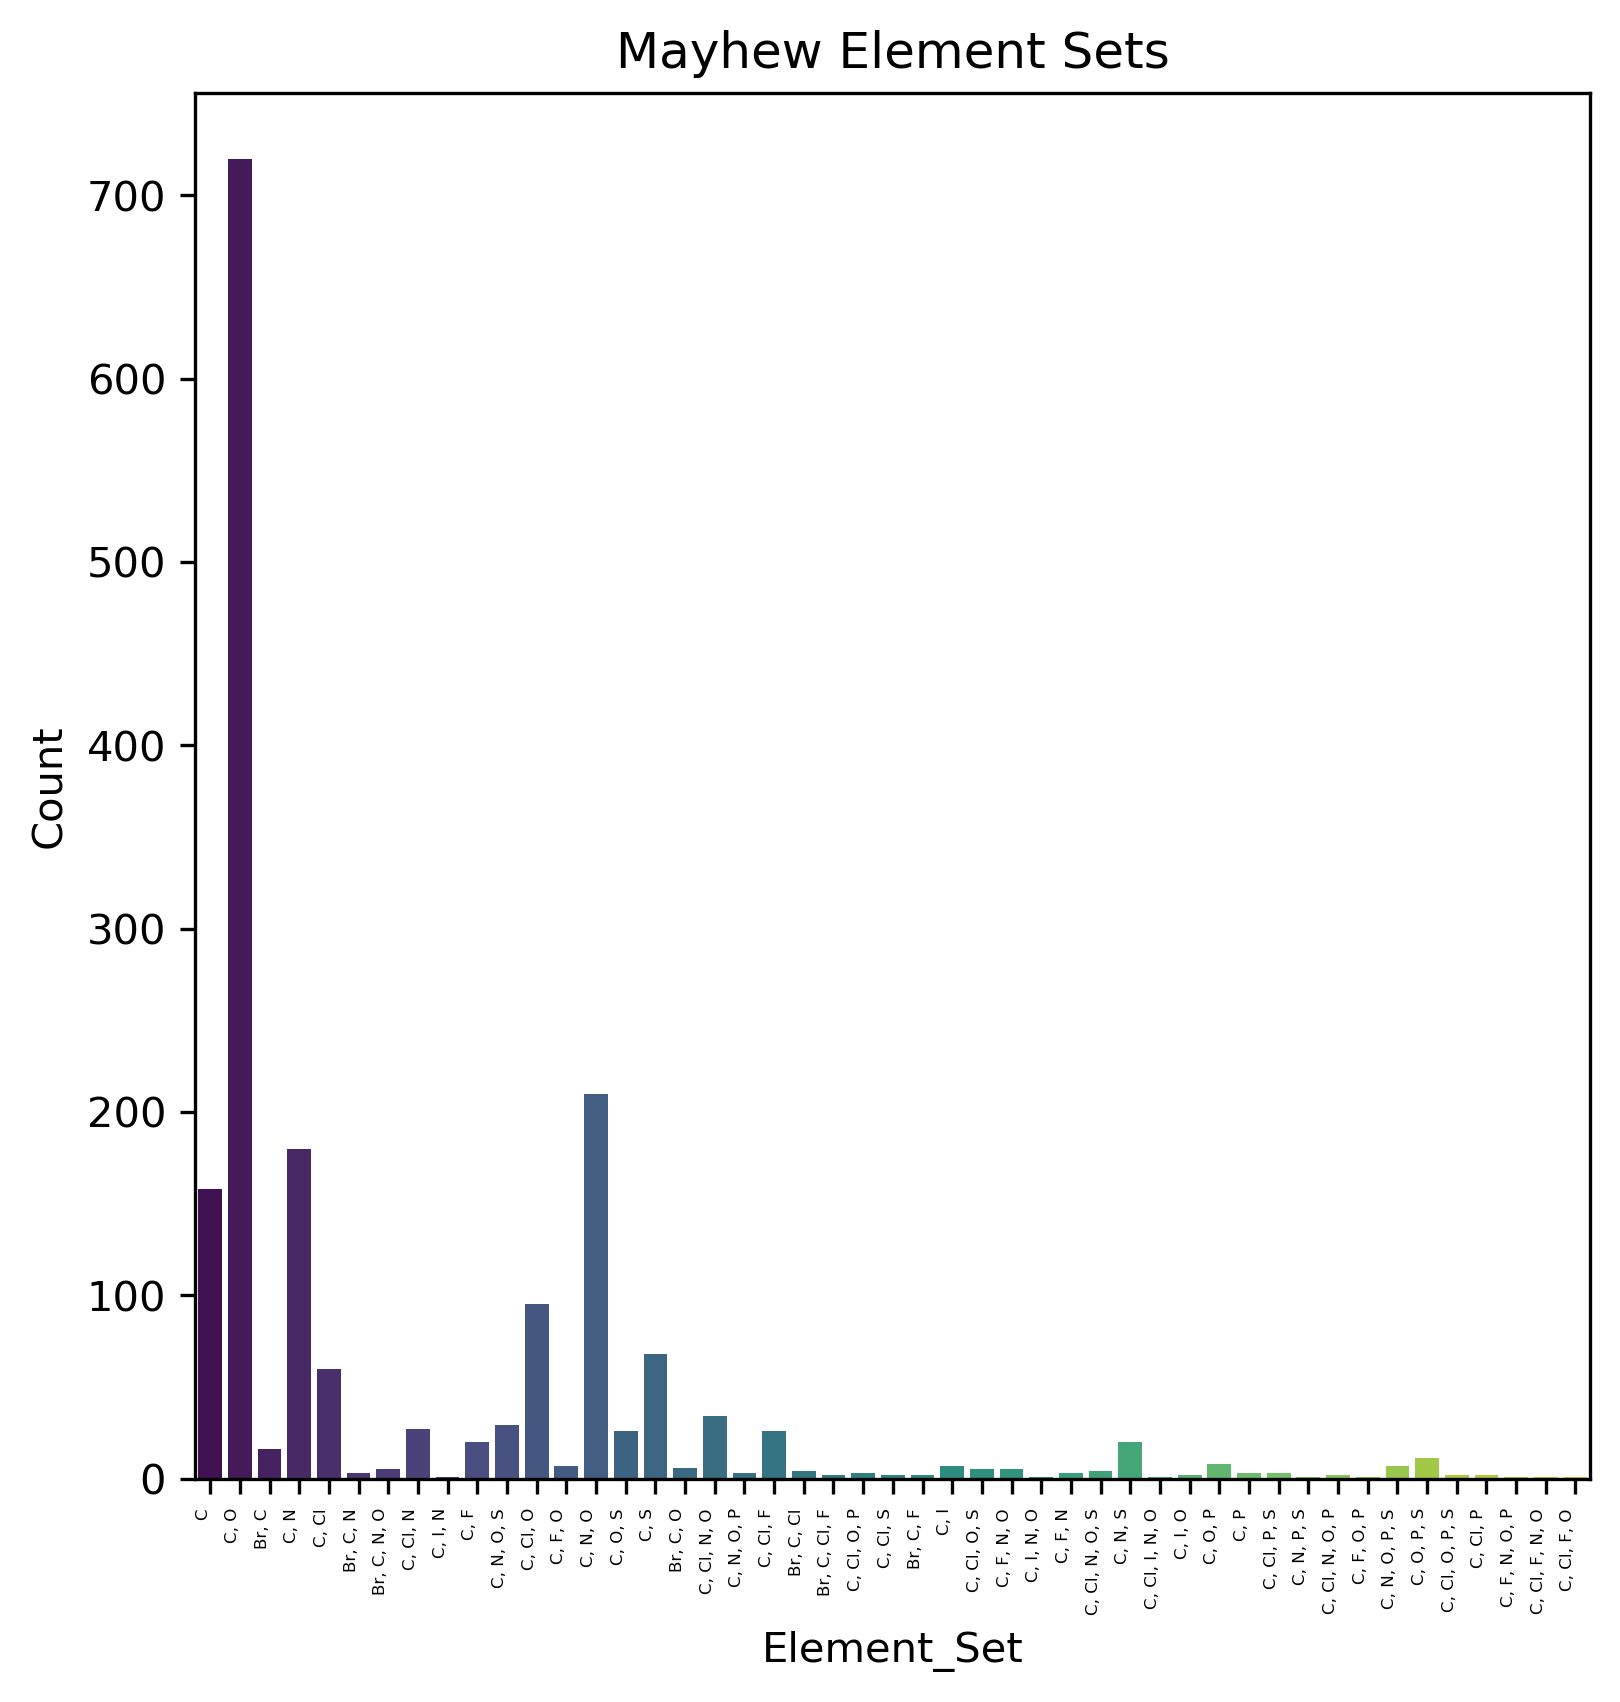

In [49]:
fig, ax = plt.subplots(1,1, figsize=(6,6), dpi=300)
g = sns.barplot(data=element_set_counts_df, x='Element_Set', y='Count', palette='viridis', ax=ax)

ax.set_title("Mayhew Element Sets")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90, ha='right', fontsize=10, size=4)


In [ ]:
df['Elements'].to_numpy()

In [50]:
def is_chiral(mol):
    chiral_centers = Chem.FindMolChiralCenters(mol, includeUnassigned=True)
    return len(chiral_centers) > 0

In [51]:
df['chiral'] = df.apply(lambda row: is_chiral(row['rdkit']), axis=1)

In [52]:
df['chiral'].describe()

count      1798
unique        2
top       False
freq       1459
Name: chiral, dtype: object

In [53]:
from rdkit.Chem import rdchem

def check_cis_trans_isomerism(mol):
    has_cis_trans = False
    for bond in mol.GetBonds():
        # Check if the bond is a double bond
        if bond.GetBondType() == rdchem.BondType.DOUBLE:
            # Check if the double bond has stereochemistry information
            stereo = bond.GetStereo()
            if stereo in [rdchem.BondStereo.STEREOZ, rdchem.BondStereo.STEREOE, rdchem.BondStereo.STEREOCIS, rdchem.BondStereo.STEREOTRANS]:
                has_cis_trans = True
                break

    return has_cis_trans

In [54]:
df['cistrans'] = df.apply(lambda row: check_cis_trans_isomerism(row['rdkit']), axis=1)

In [55]:
df['cistrans'].describe()

count      1798
unique        2
top       False
freq       1785
Name: cistrans, dtype: object

In [56]:
smiles_list = ['C/C=C/C', 'CC=CC', 'C/C=C\C', 'CCO', 'C=C']

for smiles in smiles_list:
    is_cis_trans = check_cis_trans_isomerism(smiles)
    print(f"{smiles}: {'Has cis-trans isomerism' if is_cis_trans else 'No cis-trans isomerism'}")

AttributeError: 'str' object has no attribute 'GetBonds'

In [59]:
df['is_odor_bool'] = df.apply(lambda row: bool(row['is_odor']), axis=1)

In [60]:
df['is_odor_bool'].describe()

count     1798
unique       2
top       True
freq      1527
Name: is_odor_bool, dtype: object